In [1]:
import requests 
from bs4 import BeautifulSoup as bs 
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import pandas as pd 
import matplotlib.pyplot as plt

r = requests.get('https://us.youtubers.me/global/all/top-1000-most-subscribed-youtube-channels') 
soup = bs(r.content)

In [2]:
table = soup.select('table')[0] 
columns = table.find_all('th')

In [3]:
table_df = pd.read_html(str(table))[0]
table_df[table_df.isna().any(axis=1)]
table_df = table_df.dropna()
table_df['older'] = 2023 - table_df['started']
table_df

,rank,Youtuber,subscribers,video views,video count,category,started,older
0,1,T-Series,235000000,214879618375,18682,Music,2006,17
1,2,YouTube Movies,162000000,0,0,Film & Animation,2015,8
2,3,Cocomelon - Nursery Rhymes,153000000,150914837068,855,Education,2006,17
3,4,SET India,151000000,139174285312,104636,Shows,2006,17
4,5,MrBeast,132000000,22317660280,734,Entertainment,2012,11
...,...,...,...,...,...,...,...,...
995,996,CarryisLive,11600000,1454501310,947,Gaming,2017,6
996,997,Painzeiro,11600000,2208168452,969,People & Blogs,2015,8
997,998,Alexa Rivera,11600000,2518823177,259,Howto & Style,2010,13
998,999,The Film Theorists,11600000,2453689060,387,Film & Animation,2014,9


In [4]:
# get the response in the form of html
wikiurls = {
            '2023':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=1137714711",
            '2022':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=1130583610",
            '2021':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=1063042127",
            '2020':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=997160923",
            '2019':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=933295252",
            '2017':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=817975501",
            '2016':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=757339173",
            '2015':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=697648696",
            '2014':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=639808531",
            '2013':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=588583725"
           }

table_class="wikitable sortable jquery-tablesorter"

wikiResponseArray = []
for year in wikiurls:
  response=requests.get(wikiurls[year])
  wikiResponseArray.append([year, response])
  print([year, response.status_code])

print(wikiResponseArray)

['2023', 200]
['2022', 200]
['2021', 200]
['2020', 200]
['2019', 200]
['2017', 200]
['2016', 200]
['2015', 200]
['2014', 200]
['2013', 200]
[['2023', <Response [200]>], ['2022', <Response [200]>], ['2021', <Response [200]>], ['2020', <Response [200]>], ['2019', <Response [200]>], ['2017', <Response [200]>], ['2016', <Response [200]>], ['2015', <Response [200]>], ['2014', <Response [200]>], ['2013', <Response [200]>]]


In [5]:
# parse data from the html into a beautifulsoup object
dataFrameArray = []
# for response in wikiResponseArray:
soup = bs(wikiResponseArray[0][1].text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable sortable"})
df=pd.read_html(str(indiatable))
df=pd.DataFrame(df[0]).head(49)
df['Subscribers (millions)'] = df['Subscribers (millions)'].astype(str).str.replace('$', '',regex=True).astype('float')
df['Primary language'] = df['Primary language'].str.replace('[^a-zA-Z]', '',regex=True)
df.columns= df.columns.str.lower()
df

,rank,name,link,brand channel,subscribers (millions),primary language,category,country
0,1,T-Series,Link,Yes,235.0,Hindi,Music,India
1,2,Cocomelon,Link,Yes,153.0,English,Education,United States
2,3,Sony Entertainment Television India,Link,Yes,151.0,Hindi,Entertainment,India
3,4,MrBeast,Link,No,132.0,English,Entertainment,United States
4,5,PewDiePie,Link,No,111.0,English,Games,Sweden
5,6,Kids Diana Show,Link,Yes,107.0,English,Entertainment,Ukraine
6,7,Like Nastya,Link,No,104.0,English,Entertainment,United States
7,8,WWE,Link,Yes,93.2,English,Sports,United States
8,9,Vlad and Niki,Link,No,93.1,English,Entertainment,Russia
9,10,Zee Music Company,Link,Yes,92.1,Hindi,Music,India


## Analysis 1:- How subscribers count correlates to video views of a video in youtube.

<AxesSubplot:xlabel='subscribers', ylabel='video views'>

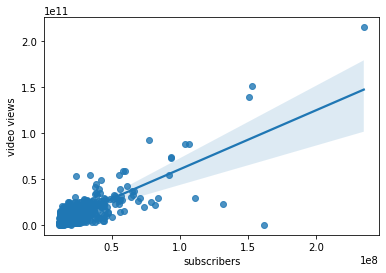

In [6]:
sns.regplot(data=table_df, x='subscribers', y='video views')

In [7]:
# Pearson correlation coefficient r
(r,p) = stats.pearsonr(table_df.subscribers, table_df['video views'])
print('r =', r, 'p =', p)

r = 0.7921847924535839 p = 2.149222422245282e-209


## Analysis 2:- How subscribers count correlates to rank in youtube channel.

<AxesSubplot:xlabel='subscribers', ylabel='rank'>

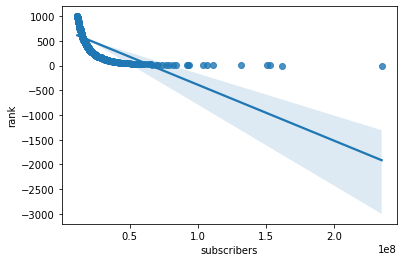

In [8]:
sns.regplot(data=table_df, x='subscribers', y='rank')

In [9]:
# Pearson correlation coefficient r
(r,p) = stats.pearsonr(table_df['subscribers'],table_df['rank'])
print('r =', r, 'p =', p)

r = -0.6445177202223571 p = 9.798768572498547e-115


<AxesSubplot:xlabel='video count', ylabel='older'>

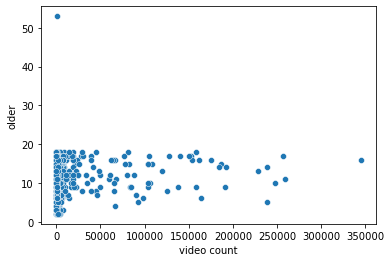

In [10]:
sns.scatterplot(data=table_df, x='video count', y='older')

<AxesSubplot:xlabel='video count', ylabel='video views'>

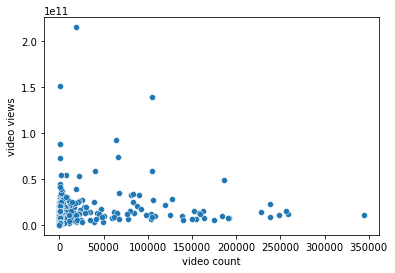

In [11]:
sns.scatterplot(data=table_df, x='video count', y='video views')

<AxesSubplot:xlabel='video count', ylabel='subscribers'>

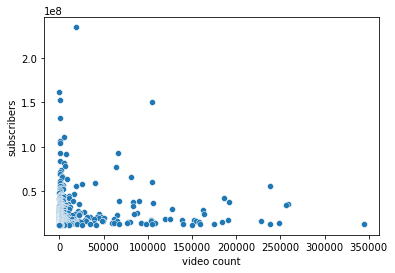

In [12]:
sns.scatterplot(data=table_df, x='video count', y='subscribers')

<AxesSubplot:xlabel='subscribers', ylabel='video views'>

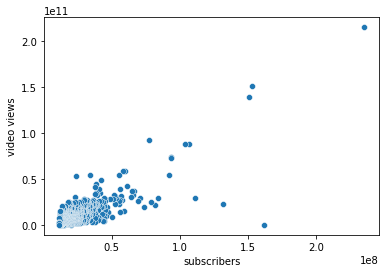

In [13]:
sns.scatterplot(data=table_df, x='subscribers', y='video views')

<AxesSubplot:xlabel='category', ylabel='subscribers'>

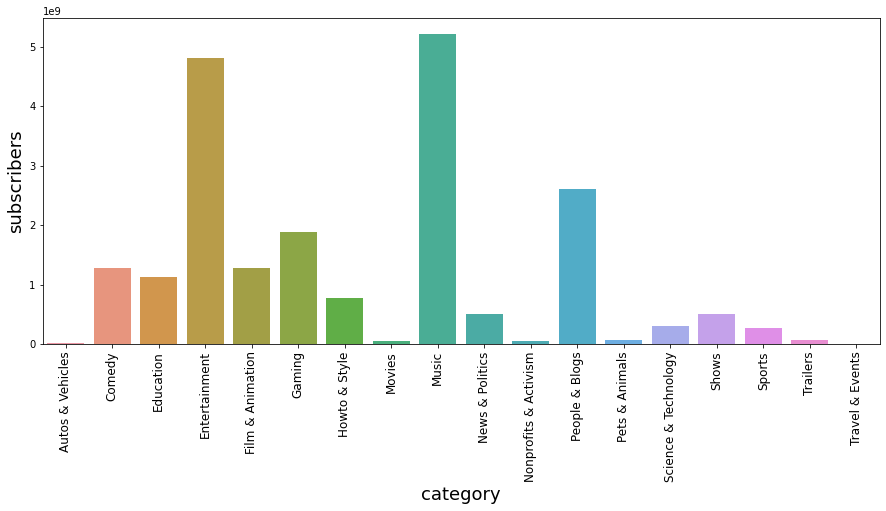

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('category', fontsize=18)
plt.ylabel('subscribers', fontsize=18)

categoryToSubscribers = table_df.groupby(['category']).agg({'subscribers':'sum'}).reset_index()
sns.barplot(data=categoryToSubscribers, x='category', y='subscribers')

<AxesSubplot:xlabel='country', ylabel='subscribers (millions)'>

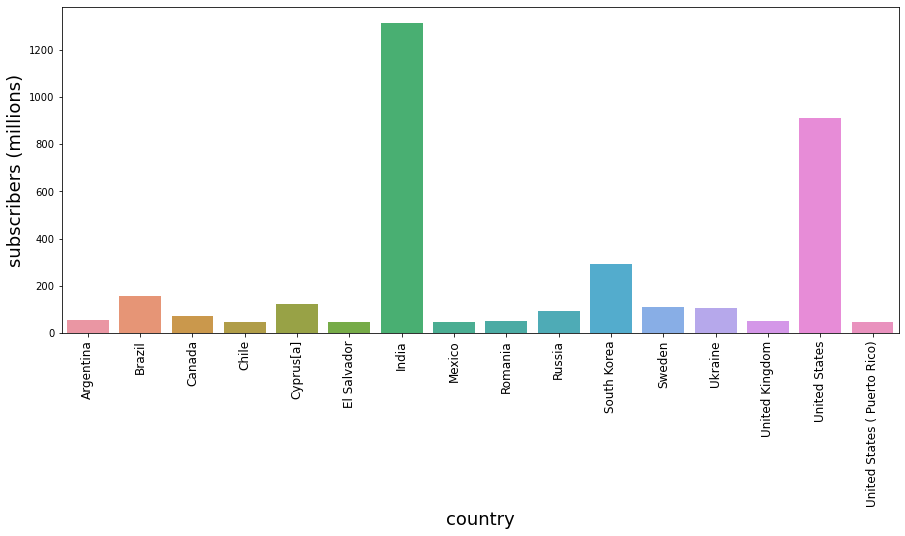

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('Country', fontsize=18)
plt.ylabel('subscribers', fontsize=18)

countryToSubscribers = df.groupby(['country']).agg({'subscribers (millions)':'sum'}).reset_index()
sns.barplot(data=countryToSubscribers, x='country', y='subscribers (millions)')

<AxesSubplot:xlabel='primary language', ylabel='subscribers (millions)'>

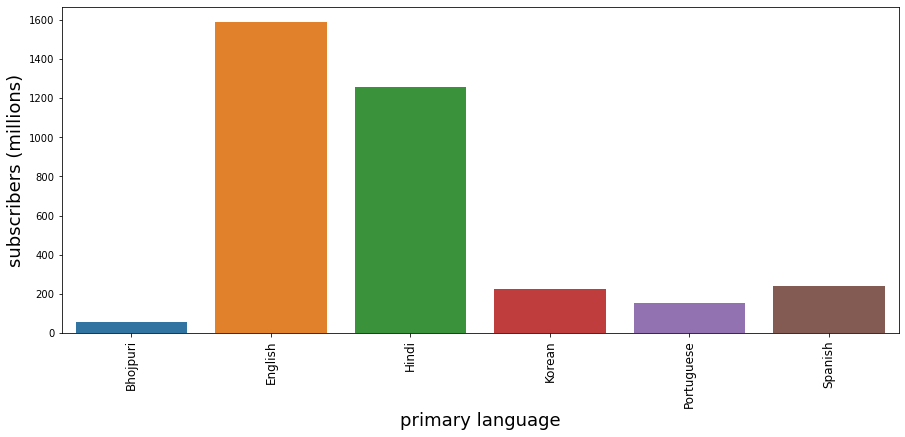

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('Country', fontsize=18)
plt.ylabel('subscribers', fontsize=18)

countryToSubscribers = df.groupby(['primary language']).agg({'subscribers (millions)':'sum'}).reset_index()
sns.barplot(data=countryToSubscribers, x='primary language', y='subscribers (millions)')

<AxesSubplot:xlabel='primary language', ylabel='video count'>

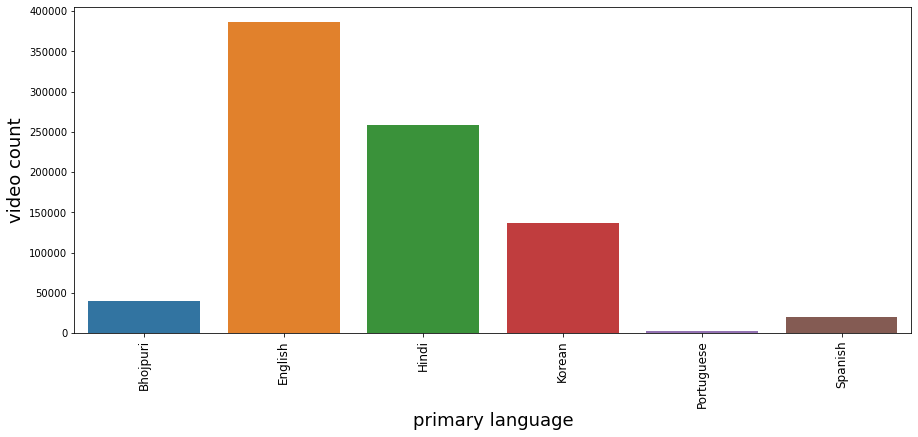

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('primary language', fontsize=18)
plt.ylabel('video count', fontsize=18)

df['rank'] = df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')
table_df['rank'] = table_df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')

mergedTable = pd.merge(df, table_df, on='rank')

mergedTable
countryToSubscribers = mergedTable.groupby(['primary language']).agg({'video count':'sum'}).reset_index()
sns.barplot(data=countryToSubscribers, x='primary language', y='video count')

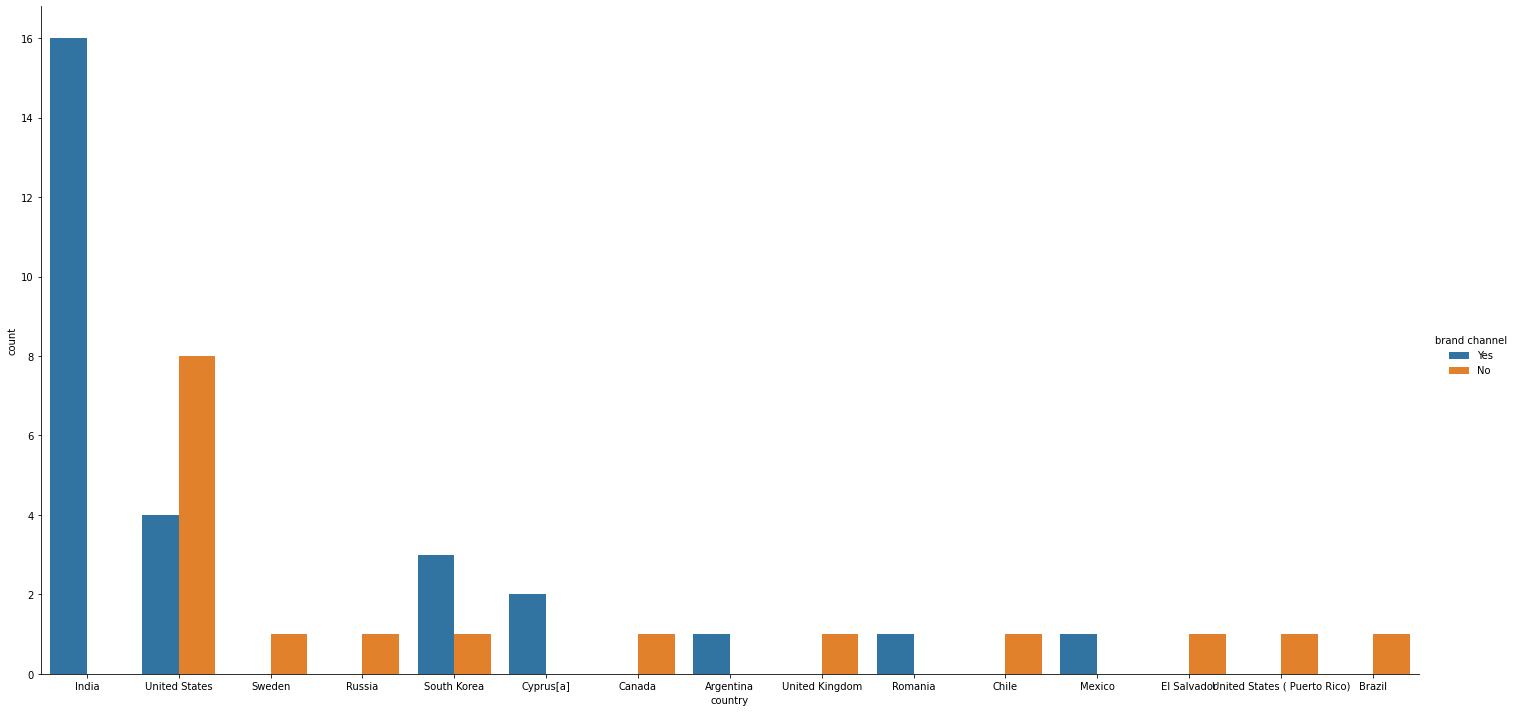

In [39]:
df['rank'] = df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')
table_df['rank'] = table_df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')

mergedTable = pd.merge(df.head(48), table_df, on='rank')
mergedTable

sns.catplot(x='country', hue='brand channel', data=mergedTable, kind='count', height=10, aspect=2)

<AxesSubplot:xlabel='country', ylabel='video views'>

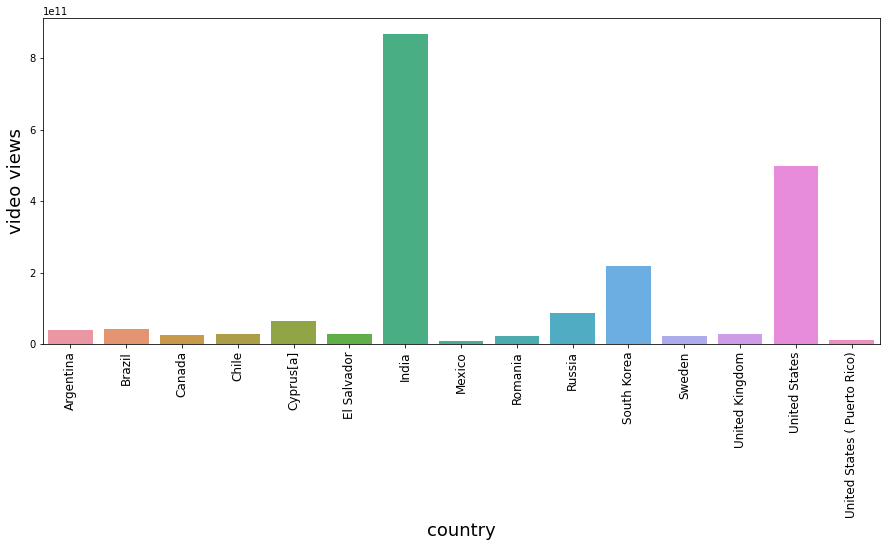

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('primary language', fontsize=18)
plt.ylabel('video count', fontsize=18)

df['rank'] = df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')
table_df['rank'] = table_df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')

mergedTable = pd.merge(df, table_df, on='rank')

mergedTable
countryToSubscribers = mergedTable.groupby(['country']).agg({'video views':'sum'}).reset_index()
sns.barplot(data=countryToSubscribers, x='country', y='video views')